In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav
from scipy.interpolate import interp1d
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from matplotlib import gridspec

from mk_arrays import create_arr

In [2]:
# import arrays
tube = readsav('/Users/WilliamHenryAshfieldIV/spring2020/dat/f4.sav',verbose=False,python_dict=False)
frac = readsav('/Users/WilliamHenryAshfieldIV/spring2020/dat/f4_si_iv_nei.sav',verbose=False,python_dict=False)
log10T,log10G = np.loadtxt('/Users/WilliamHenryAshfieldIV/spring2020/dat/goft_1403.dat.txt',comments='%',unpack=True)

In [3]:
arrs = create_arr(tube,frac,log10T,log10G,time=97)
x = arrs['x']
v = arrs['v']
T = arrs['T']
ne = arrs['ne']
wav = arrs['wav']
spec = arrs['spec']
EM = arrs['EM']

/Users/WilliamHenryAshfieldIV/spring2020/spec_notebooks/mk_arrays.py:98: RuntimeWarning: invalid value encountered in true_divide
  factor = nei/eqi


In [7]:
EM /= np.max(EM)
ne /= np.max(ne)

(0, 0.3)

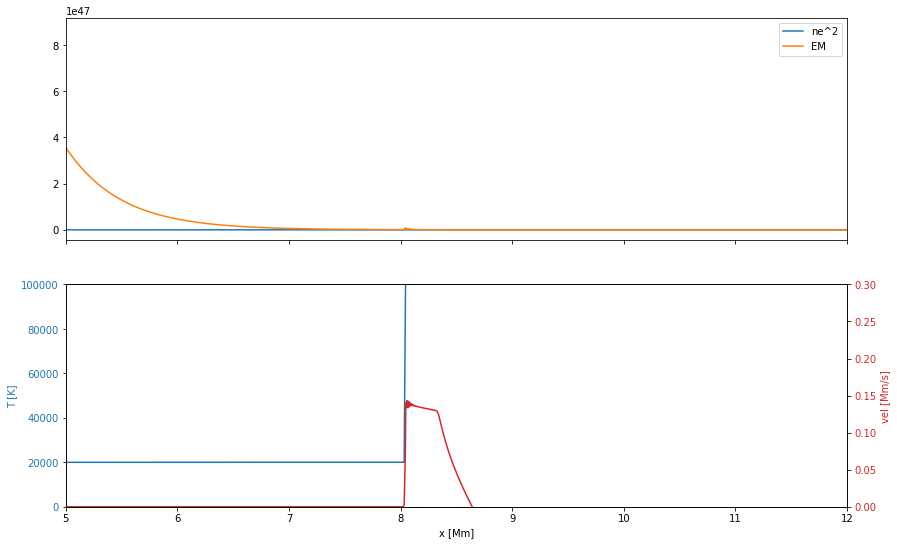

In [5]:
fig, axs = plt.subplots(2,1,figsize=(14,9),sharex=True)
axs[0].plot(x,ne**2,label='ne^2')
axs[0].plot(x,EM,label='EM')
axs[0].set_xlim(5,12)
axs[0].legend()

color = 'tab:blue'
axs[1].plot(x,T*1e6,color=color)
axs[1].set_ylim(0,1e5)
axs[1].set_xlabel('x [Mm]')
axs[1].set_ylabel('T [K]', color=color)
axs[1].tick_params(axis='y', labelcolor=color)


ax3 = axs[1].twinx()
color = 'tab:red'
ax3.plot(x, v, color=color)
ax3.set_ylabel('vel [Mm/s]', color=color)  # we already handled the x-label with ax1
ax3.tick_params(axis='y', labelcolor=color)
ax3.set_ylim(0,0.3)

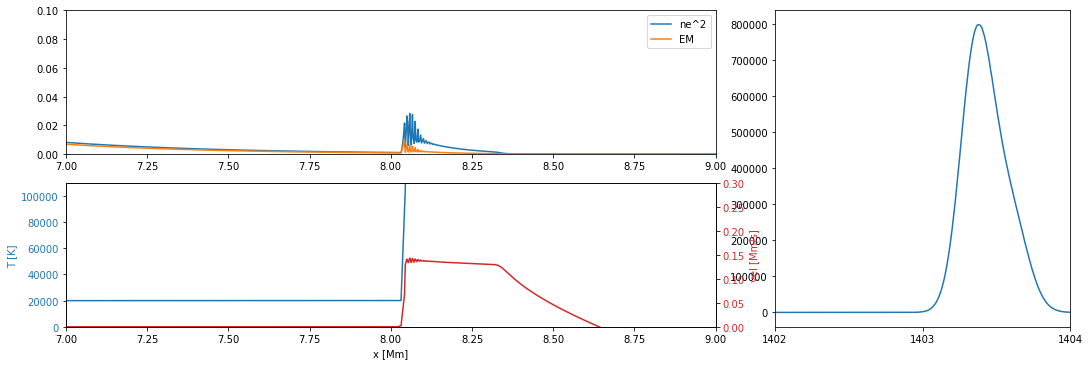

In [17]:
fig = plt.figure(figsize=(18,9))
ax1 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax2 = plt.subplot2grid((3, 3), (2, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)

ax1.plot(x,ne**2,label='ne^2')
ax1.plot(x,EM,label='EM')
ax1.set_xlim(7,9)
ax1.set_ylim(0,0.1)
ax1.legend()

color = 'tab:blue'
ax2.plot(x,T*1e6,color=color)
ax2.set_ylim(0,1.1e5)
ax2.set_xlabel('x [Mm]')
ax2.set_ylabel('T [K]', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xlim(7,9)


ax4 = ax2.twinx()
color = 'tab:red'
ax4.plot(x, v, color=color)
ax4.set_ylabel('vel [Mm/s]', color=color)  # we already handled the x-label with ax1
ax4.tick_params(axis='y', labelcolor=color)
ax4.set_ylim(0,0.3)


ax3.plot(wav,spec)
ax3.set_xlim(1402,1404)
ax3.set_xticks(np.arange(1402, 1405, 1))
